1. Pasos generales que seguiremos:
    - Preparación de datos: Cargar y preprocesar las imágenes.
    - Construcción del modelo: Crear una red neuronal convolucional (CNN) o usar un modelo preentrenado (transfer learning).
    - Entrenamiento: Entrenar el modelo con los datos.
    - Guardar el modelo: Exportar el modelo entrenado para su uso futuro.
    - Evaluación: Probar el modelo con datos nuevos.

2. Herramientas que usaremos:
    - TensorFlow/Keras: Para construir y entrenar el modelo.
    - OpenCV/PIL: Para el procesamiento de imágenes.
    - NumPy: Para manipulación de datos.
    - Matplotlib/Seaborn: Para visualización.

### Librerias necesarias:

- pip install pandas
- pip install scikit-learn
- pip install imblearn
- pip install seaborn
- pip install torch
- pip install torchvision

pip install pandas scikit-learn imblearn seaborn torch torchvision

---
---
### Lista de encabezados
1. Piezas del Vehículo:
-   1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Capó",
    4: "Cerradura capo",
    5: "Cerradura maletero",
    6: "Cerradura puerta",
    7: "Espejo lateral derecho",
    8: "Espejo lateral izquierdo",
    9: "Faros derecho",
    10: "Faros izquierdo",
    11: "Guardabarros delantero derecho",
    12: "Guardabarros delantero izquierdo",
    13: "Guardabarros trasero derecho",
    14: "Guardabarros trasero izquierdo",
    15: "Luz indicadora delantera derecha",
    16: "Luz indicadora delantera izquierda",
    17: "Luz indicadora trasera derecha",
    18: "Luz indicadora trasera izquierda",
    19: "Luz trasera derecho",
    20: "Luz trasera izquierdo",
    21: "Maletero",
    22: "Manija derecha",
    23: "Manija izquierda",
    24: "Marco de la ventana",
    25: "Marco de las puertas",
    26: "Moldura capó",
    27: "Moldura maletro",
    28: "Moldura puerta delantera derecha",
    29: "Moldura puerta delantera izquierda",
    30: "Moldura puerta trasera derecha",
    31: "Moldura puerta trasera izquierda",
    32: "Parabrisas delantero",
    33: "Parabrisas trasero",
    34: "Parachoques delantero",
    35: "Parachoques trasero",
    36: "Puerta delantera derecha",
    37: "Puerta delantera izquierda",
    38: "Puerta trasera derecha",
    39: "Puerta trasera izquierda",
    40: "Rejilla, parrilla",
    41: "Rueda",
    42: "Tapa de combustible",
    43: "Tapa de rueda",
    44: "Techo",
    45: "Techo corredizo",
    46: "Ventana delantera derecha",
    47: "Ventana delantera izquierda",
    48: "Ventana trasera derecha",
    49: "Ventana trasera izquierda",
    50: "Ventanilla delantera derecha",
    51: "Ventanilla delantera izquierda",
    52: "Ventanilla trasera derecha",
    53: "Ventanilla trasera izquierda"

2. Tipos de Daño:
- 1: "Abolladura",
    2: "Deformación",
    3: "Desprendimiento",
    4: "Fractura",
    5: "Rayón",
    6: "Rotura"

3. Sugerencia:
- 1:"Reparar", 
2:"Reemplazar"

In [1]:
import pandas as pd
import seaborn as sns

1. Diccionarios completos: Todos los mapeos completos para piezas, daños y sugerencias.

In [ ]:
# Diccionario para Piezas del Vehículo correciones

# clases_raras = [4, 11, 21, 23, 27, 36, 37, 60, 61]  # Clases con pesos >10
# Clases que se deben de agregar mas casos
# 8: "Espejo lateral izquierdo"
# 16: "Luz indicadora delantera izquierda"
# 18: "Luz indicadora trasera izquierda"
# 22: "Manija derecha"
# 30: "Moldura puerta trasera derecha"
# 31: "Moldura puerta trasera izquierda"
# 51: "Ventanilla delantera izquierda"
# 52: "Ventanilla trasera derecha"

# Clases que seran eliminadas del set de datos
# 3: "Asiento"
# 4: "Brazo del techo"
# 5: "Brazo transversal"
# 12: "Espejo retrovisor"
# 19: "Limpiaparabrisas"
# 27: "Molduras maletero"
# 31: "Matrícula"
# 42: "Poste del techo"
# 47: "Radiador"
# 50: "Silenciador, el mofle"
# 63: "Volante"

# Nuevas clases clases_raras = [17, 18, 22, 27, 29, 30, 31, 51, 52]

# =============================================
# 1. DICCIONARIOS COMPLETOS DE MAPEO (CORREGIDOS)
# =============================================
label_to_cls_piezas = {
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Capó",
    4: "Cerradura capo",
    5: "Cerradura maletero",
    6: "Cerradura puerta",
    7: "Espejo lateral derecho",
    8: "Espejo lateral izquierdo",
    9: "Faros derecho",
    10: "Faros izquierdo",
    11: "Guardabarros delantero derecho",
    12: "Guardabarros delantero izquierdo",
    13: "Guardabarros trasero derecho",
    14: "Guardabarros trasero izquierdo",
    15: "Luz indicadora delantera derecha",
    16: "Luz indicadora delantera izquierda",
    17: "Luz indicadora trasera derecha",
    18: "Luz indicadora trasera izquierda",
    19: "Luz trasera derecho",
    20: "Luz trasera izquierdo",
    21: "Maletero",
    22: "Manija derecha",
    23: "Manija izquierda",
    24: "Marco de la ventana",
    25: "Marco de las puertas",
    26: "Moldura capó",
    27: "Moldura puerta delantera derecha",
    28: "Moldura puerta delantera izquierda",
    29: "Moldura puerta trasera derecha",
    30: "Moldura puerta trasera izquierda",
    31: "Parabrisas delantero",
    32: "Parabrisas trasero",
    33: "Parachoques delantero",
    34: "Parachoques trasero",
    35: "Puerta delantera derecha",
    36: "Puerta delantera izquierda",
    37: "Puerta trasera derecha",
    38: "Puerta trasera izquierda",
    39: "Rejilla, parrilla",
    40: "Rueda",
    41: "Tapa de combustible",
    42: "Tapa de rueda",
    43: "Techo",
    44: "Techo corredizo",
    45: "Ventana delantera derecha",
    46: "Ventana delantera izquierda",
    47: "Ventana trasera derecha",
    48: "Ventana trasera izquierda",
    49: "Ventanilla delantera derecha",
    50: "Ventanilla delantera izquierda",
    51: "Ventanilla trasera derecha",
    52: "Ventanilla trasera izquierda"
}

# Clases que seran eliminadas del set de datos
# 2: "Corrosión",
# Diccionario para Tipos de Daño (completo)
label_to_cls_danos = {
    1: "Abolladura",
    2: "Deformación",
    3: "Desprendimiento",
    4: "Fractura",
    5: "Rayón",
    6: "Rotura"
}

# Diccionario para Sugerencia (completo)
label_to_cls_sugerencia = {
    1: "Reparar",
    2: "Reemplazar"
}


2. Procesamiento robusto:
    - Limpieza de texto (minúsculas, eliminar espacios)
    - Manejo de valores compuestos (ej. "Abolladura-dent")
    - Manejo de errores y valores no encontrados

In [3]:
# Crear diccionarios inversos (texto -> número)
cls_to_label_piezas = {v.lower().strip(): k for k, v in label_to_cls_piezas.items()}
cls_to_label_danos = {v.lower().strip(): k for k, v in label_to_cls_danos.items()}
cls_to_label_sugerencia = {v.lower().strip(): k for k, v in label_to_cls_sugerencia.items()}

3. Validación de datos:
    - Detección y reporte de valores que no se pudieron mapear
    - Verificación de conteo de registros

4. Manejo de casos especiales:
    - Valores nulos o faltantes
    - Texto con formatos inconsistentes

In [4]:
# =============================================
# 2. FUNCIONES DE PROCESAMIENTO
# =============================================

def limpiar_texto(texto):
    """Limpia y estandariza el texto para comparación"""
    if pd.isna(texto):
        return ""
    return texto.lower().strip()

def procesar_dano(texto):
    """Procesa la columna Tipos de Daño (maneja casos como 'Abolladura-dent')"""
    texto = limpiar_texto(texto)
    if '-' in texto:
        return texto.split('-')[0]
    return texto

def mapear_valor(texto, diccionario, columna):
    """Mapea texto a valor numérico con manejo de errores"""
    try:
        texto = limpiar_texto(texto)
        if columna == 'Tipos de Daño':
            texto = procesar_dano(texto)
        return diccionario.get(texto, -1)  # -1 para valores no encontrados
    except Exception as e:
        print(f"Error procesando valor: {texto} - {str(e)}")
        return -1

5. Metadatos útiles:
    - Reporte de valores no encontrados
    - Confirmación del proceso completado

In [5]:
# =============================================
# 3. PROCESAR EL ARCHIVO CSV
# =============================================

# Leer el archivo original (ajusta el separador según tu archivo)
df = pd.read_csv('data/fotos_siniestros/clasificacion_fotos_partes_reducida_1145.csv', sep='|')

# Aplicar el mapeo a cada columna
df['Tipos de Daño_encoded'] = df['Tipos de Daño'].apply(
    lambda x: mapear_valor(x, cls_to_label_danos, 'Tipos de Daño'))
df['Piezas del Vehículo_encoded'] = df['Piezas del Vehículo'].apply(
    lambda x: mapear_valor(x, cls_to_label_piezas, 'Piezas del Vehículo'))
df['Sugerencia_encoded'] = df['Sugerencia'].apply(
    lambda x: mapear_valor(x, cls_to_label_sugerencia, 'Sugerencia'))

# Verificar valores no mapeados (-1)
for col in ['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']:
    no_encontrados = df[df[f'{col}_encoded'] == -1][col].unique()
    if len(no_encontrados) > 0:
        print(f"\nADVERTENCIA: Valores no mapeados en {col}:")
        print(no_encontrados)

In [6]:
# =============================================
# 4. CREAR NUEVO CSV CON ETIQUETAS
# =============================================

# Seleccionar y renombrar columnas
df_encoded = df[[
    'Imagen',
    'Tipos de Daño_encoded',
    'Piezas del Vehículo_encoded',
    'Sugerencia_encoded'
]].rename(columns={
    'Tipos de Daño_encoded': 'Tipos de Daño',
    'Piezas del Vehículo_encoded': 'Piezas del Vehículo',
    'Sugerencia_encoded': 'Sugerencia'
})

# Guardar el nuevo archivo CSV
df_encoded.to_csv('data/fotos_siniestros/datos_vehiculos_encoded.csv', index=False, sep='|')

print("\nProceso completado exitosamente!")
print(f"Archivo original: {len(df)} registros")
print(f"Archivo codificado: {len(df_encoded)} registros")
print("Nuevo archivo guardado como: datos_vehiculos_encoded.csv")


Proceso completado exitosamente!
Archivo original: 1832 registros
Archivo codificado: 1832 registros
Nuevo archivo guardado como: datos_vehiculos_encoded.csv


Separar los datos para entrenamientos y pruebas.

- Manejo de imágenes múltiples: Agrupa y consolida correctamente imágenes con múltiples registros (como 9.jpg y 15.jpg en tu ejemplo).

- División estratificada: Mantiene proporciones similares de clases en todos los conjuntos, especialmente para la columna "Sugerencia".

- Reconstrucción precisa: Después de la división, expande los registros para mantener la estructura original del CSV.

- Validación incluida: Crea tres conjuntos (entrenamiento, validación y prueba) con proporciones 60%-20%-20%.

- Reporte detallado: Genera estadísticas de distribución para cada conjunto.

- Semilla aleatoria: Garantiza reproducibilidad en las divisiones.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Configuración
SEED = 42
TEST_SIZE = 0.2  # 20% para prueba
VAL_SIZE = 0.25  # 25% del entrenamiento para validación (20% del total)

# 1. Cargar los datos codificados
df = pd.read_csv('data/fotos_siniestros/datos_vehiculos_encoded.csv', sep='|')

In [9]:
# 2. Manejar imágenes con múltiples registros (como 9.jpg, 15.jpg)
# Agrupamos por imagen y consolidamos las etiquetas
def consolidar_etiquetas(group):
    return pd.Series({
        'Tipos de Daño': list(group['Tipos de Daño'].unique()),
        'Piezas del Vehículo': list(group['Piezas del Vehículo'].unique()),
        'Sugerencia': list(group['Sugerencia'].unique())
    })

df_consolidado = df.groupby('Imagen').apply(consolidar_etiquetas).reset_index()

/tmp/ipykernel_20248/862122714.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_consolidado = df.groupby('Imagen').apply(consolidar_etiquetas).reset_index()


### Mejorando el manejo de imagenes:

    - Selección explícita de columnas: Al incluir [['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']] después del groupby, estamos siendo explícitos sobre qué columnas queremos procesar.
    - group_keys=False: Este parámetro evita que Pandas incluya las claves de agrupación en el resultado.
    - Manejo mejorado de NaN: La función clean_unique ahora usa dropna() que es más eficiente que filter(pd.notna, ...).

In [8]:
# 2. Manejar imágenes con múltiples registros (como 9.jpg, 15.jpg)
# Agrupamos por imagen y consolidamos las etiquetas
def consolidar_etiquetas(group):
    result = {
        'Tipos de Daño': [],
        'Piezas del Vehículo': [],
        'Sugerencia': []
    }
    
    for col in result.keys():
        unique_values = group[col].dropna().unique()
        result[col] = unique_values.tolist()
    
    return pd.Series(result)

df_consolidado = (
    df.groupby('Imagen', group_keys=False)
    [['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']]  # Selección explícita de columnas
    .apply(consolidar_etiquetas)
    .reset_index()
)

In [9]:
# 3. Dividir los datos
# Primero dividimos en entrenamiento+validación (80%) y prueba (20%)
train_val_df, test_df = train_test_split(
    df_consolidado,
    test_size=TEST_SIZE,
    random_state=SEED,
    stratify=df_consolidado['Sugerencia'].apply(lambda x: x[0])  # Estratificar por primera sugerencia
)

In [10]:
# Luego dividimos el entrenamiento en entrenamiento (60%) y validación (20%)
train_df, val_df = train_test_split(
    train_val_df,
    test_size=VAL_SIZE/(1-TEST_SIZE),  # Ajustar para que sea 20% del total
    random_state=SEED,
    stratify=train_val_df['Sugerencia'].apply(lambda x: x[0])
)

In [11]:
# 4. Reconstruir los DataFrames originales (desagrupar las listas)
def expandir_registros(df):
    records = []
    for _, row in df.iterrows():
        for tipo in row['Tipos de Daño']:
            for pieza in row['Piezas del Vehículo']:
                for sugerencia in row['Sugerencia']:
                    records.append({
                        'Imagen': row['Imagen'],
                        'Tipos de Daño': tipo,
                        'Piezas del Vehículo': pieza,
                        'Sugerencia': sugerencia
                    })
    return pd.DataFrame(records)# Aplicar oversampling con SMOTE

# Aplicar oversampling con SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(df[['Tipos de Daño', 'Piezas del Vehículo']], df['Sugerencia'])

train_expanded = expandir_registros(train_df)
val_expanded = expandir_registros(val_df)
test_expanded = expandir_registros(test_df)

In [12]:
# 5. Guardar los conjuntos de datos
os.makedirs('data/fotos_siniestros/datasets', exist_ok=True)

train_expanded.to_csv('data/fotos_siniestros/datasets/train.csv', index=False, sep='|')
val_expanded.to_csv('data/fotos_siniestros/datasets/val.csv', index=False, sep='|')
test_expanded.to_csv('data/fotos_siniestros/datasets/test.csv', index=False, sep='|')

In [13]:
# Cargar los datasets
train_expanded = pd.read_csv('data/fotos_siniestros/datasets/train.csv', sep='|')
val_expanded = pd.read_csv('data/fotos_siniestros/datasets/val.csv', sep='|')
test_expanded = pd.read_csv('data/fotos_siniestros/datasets/test.csv', sep='|')

Reporte rápido para análisis estadístico

In [14]:
# 6. Generar reporte de distribución
def generar_reporte(df, nombre):
    print(f"\nDistribución en {nombre}:")
    print(f"- Total registros: {len(df)}")
    print(f"- Imágenes únicas: {df['Imagen'].nunique()}")
    print("Distribución de sugerencias:")
    print(df['Sugerencia'].value_counts(normalize=True))
    print("\nDistribución de tipos de daño:")
    print(df['Tipos de Daño'].value_counts(normalize=True))
    print("\nDistribución de piezas (top 10):")
    print(df['Piezas del Vehículo'].value_counts(normalize=True).head(10))

generar_reporte(train_expanded, "Entrenamiento")
generar_reporte(val_expanded, "Validación")
generar_reporte(test_expanded, "Prueba")

print("\nProceso completado. Archivos guardados en:")
print("- data/fotos_siniestros/datasets/train.csv")
print("- data/fotos_siniestros/datasets/val.csv")
print("- data/fotos_siniestros/datasets/test.csv")


Distribución en Entrenamiento:
- Total registros: 2436
- Imágenes únicas: 629
Distribución de sugerencias:
Sugerencia
1    0.578407
2    0.421593
Name: proportion, dtype: float64

Distribución de tipos de daño:
Tipos de Daño
6    0.349754
1    0.310755
5    0.142036
2    0.086207
3    0.077176
4    0.034072
Name: proportion, dtype: float64

Distribución de piezas (top 10):
Piezas del Vehículo
33    0.170361
34    0.080049
11    0.075944
12    0.072660
3     0.071018
9     0.068144
10    0.056650
31    0.047619
20    0.036125
40    0.036125
Name: proportion, dtype: float64

Distribución en Validación:
- Total registros: 1054
- Imágenes únicas: 287
Distribución de sugerencias:
Sugerencia
1    0.589184
2    0.410816
Name: proportion, dtype: float64

Distribución de tipos de daño:
Tipos de Daño
6    0.332068
1    0.323529
5    0.115750
2    0.111954
3    0.086338
4    0.030361
Name: proportion, dtype: float64

Distribución de piezas (top 10):
Piezas del Vehículo
33    0.206831
12    0.098

Análisis exhaustivo de la distribución de las clases en cada categoría (Tipos de Daño, Piezas del Vehículo y Sugerencia).

Esto permitira saber si el dataset esta balanceado o no, si no esta balanceado se pueden ajustar Para datasets desbalanceados se puede modificar el parámetro stratify.

Método 1: Análisis Estadístico Básico

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('data/fotos_siniestros/datos_vehiculos_encoded.csv', sep='|')

# 1. Análisis para 'Sugerencia'
sugerencia_dist = df['Sugerencia'].value_counts(normalize=True)
print("Distribución de Sugerencias:")
print(sugerencia_dist)

# 2. Análisis para 'Tipos de Daño'
danos_dist = df['Tipos de Daño'].value_counts(normalize=True)
print("\nDistribución de Tipos de Daño:")
print(danos_dist)

# 3. Análisis para 'Piezas del Vehículo' (top 20)
piezas_dist = df['Piezas del Vehículo'].value_counts(normalize=True)
print("\nDistribución de Piezas (Top 20):")
print(piezas_dist.head(20))

Distribución de Sugerencias:
Sugerencia
1    0.69214
2    0.30786
Name: proportion, dtype: float64

Distribución de Tipos de Daño:
Tipos de Daño
1    0.325873
6    0.314410
5    0.220524
2    0.062773
3    0.041485
4    0.034934
Name: proportion, dtype: float64

Distribución de Piezas (Top 20):
Piezas del Vehículo
33    0.193231
34    0.110808
31    0.076965
12    0.062227
11    0.056769
40    0.050218
3     0.042031
9     0.038755
14    0.038755
10    0.033297
36    0.033297
13    0.031659
38    0.027838
25    0.026747
35    0.025109
37    0.024563
20    0.023472
21    0.017467
19    0.015830
32    0.012555
Name: proportion, dtype: float64


Método 2: Visualización Gráfica

In [16]:
# Trabajando con seaborn.
# Ejemplo creando un estipo propio

sns.set_theme()  # Esto aplica los estilos de seaborn
### sns.set_theme(style="whitegrid", palette="pastel")

# Ver estilos disponibles
print(plt.style.available)

# Usar uno de ellos, por ejemplo:
plt.style.use('ggplot')  # O 'seaborn-v0_8', 'fivethirtyeight', etc.


# Define tus propios parámetros de estilo
mystyle = {
    'axes.facecolor': 'white',
    'axes.edgecolor': 'gray',
    'grid.color': 'lightgray',
    'font.family': 'sans-serif'
}
plt.style.use(mystyle)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


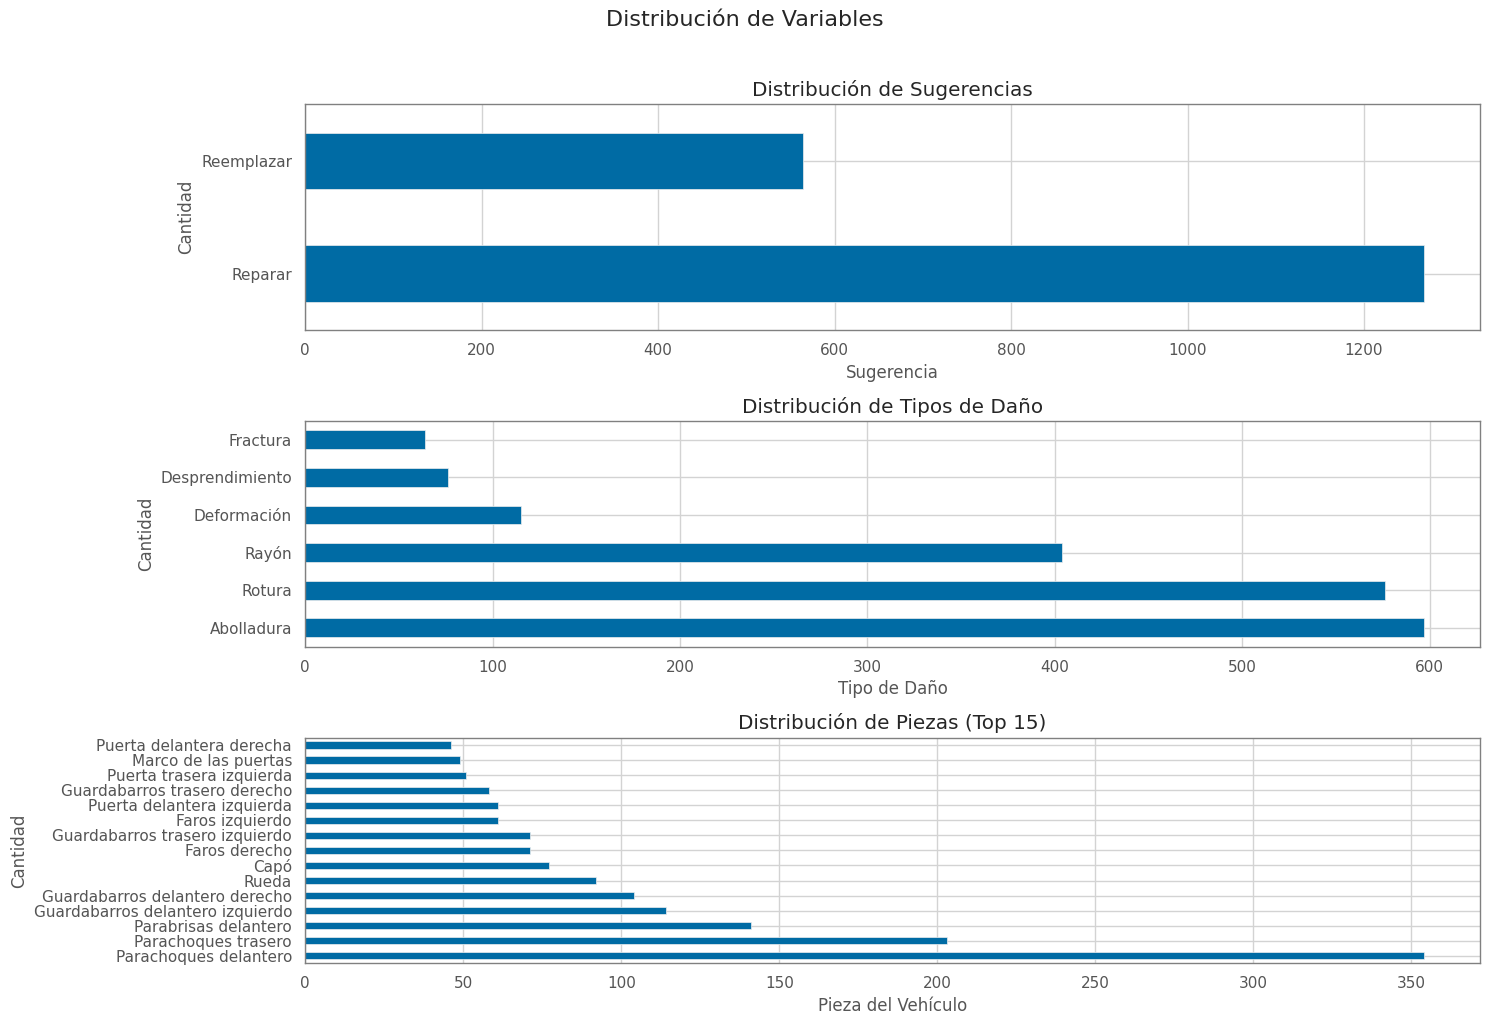

In [17]:
# Configurar el estilo de los gráficos
### plt.style.use('ggplot')
plt.style.use('tableau-colorblind10')
### plt.style.use(mystyle)
plt.figure(figsize=(15, 10))
###plt.figure(figsize=(16, 12))
plt.suptitle('Distribución de Variables', fontsize=16, y=1.02)

# 1. Gráfico para Sugerencia
plt.subplot(3, 1, 1)
### df['Sugerencia'].map({1: 'Reparar', 2: 'Reemplazar'}).value_counts().plot(kind='bar')
df['Sugerencia'].map({1: 'Reparar', 2: 'Reemplazar'}).value_counts().plot(kind='barh')
plt.title('Distribución de Sugerencias')
plt.xlabel('Sugerencia')
plt.ylabel('Cantidad')

# 2. Gráfico para Tipos de Daño
plt.subplot(3, 1, 2)
### df['Tipos de Daño'].map(label_to_cls_danos).value_counts().plot(kind='bar')
df['Tipos de Daño'].map(label_to_cls_danos).value_counts().plot(kind='barh')
plt.title('Distribución de Tipos de Daño')
plt.xlabel('Tipo de Daño')
plt.ylabel('Cantidad')

# 3. Gráfico para Piezas (Top 15)
plt.subplot(3, 1, 3)
### df['Piezas del Vehículo'].map(label_to_cls_piezas).value_counts().head(15).plot(kind='bar')
df['Piezas del Vehículo'].map(label_to_cls_piezas).value_counts().head(15).plot(kind='barh')
plt.title('Distribución de Piezas (Top 15)')
plt.xlabel('Pieza del Vehículo')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

---
Método 3: Análisis de Desbalanceo con Métricas

In [18]:
from sklearn.utils import class_weight
import numpy as np

# Calcular pesos de clase para cada categoría
def calcular_desbalanceo(columna):
    clases = df[columna].unique()
    conteos = df[columna].value_counts().sort_index()
    desbalanceo = conteos.max() / conteos.min()
    pesos = class_weight.compute_class_weight('balanced', classes=clases, y=df[columna])
    
    print(f"\nAnálisis de desbalanceo para {columna}:")
    print(f"Ratio máximo de desbalanceo: {desbalanceo:.2f}:1")
    print("Distribución absoluta:")
    print(conteos)
    print("\nDistribución porcentual:")
    print((conteos/len(df)*100).round(2))
    print("\nPesos sugeridos para balanceo:")
    print(dict(zip(clases, pesos)))

calcular_desbalanceo('Sugerencia')
calcular_desbalanceo('Tipos de Daño')
calcular_desbalanceo('Piezas del Vehículo')


Análisis de desbalanceo para Sugerencia:
Ratio máximo de desbalanceo: 2.25:1
Distribución absoluta:
Sugerencia
1    1268
2     564
Name: count, dtype: int64

Distribución porcentual:
Sugerencia
1    69.21
2    30.79
Name: count, dtype: float64

Pesos sugeridos para balanceo:
{np.int64(1): np.float64(0.722397476340694), np.int64(2): np.float64(1.624113475177305)}

Análisis de desbalanceo para Tipos de Daño:
Ratio máximo de desbalanceo: 9.33:1
Distribución absoluta:
Tipos de Daño
1    597
2    115
3     76
4     64
5    404
6    576
Name: count, dtype: int64

Distribución porcentual:
Tipos de Daño
1    32.59
2     6.28
3     4.15
4     3.49
5    22.05
6    31.44
Name: count, dtype: float64

Pesos sugeridos para balanceo:
{np.int64(1): np.float64(0.5114461194863205), np.int64(5): np.float64(0.7557755775577558), np.int64(6): np.float64(0.5300925925925926), np.int64(2): np.float64(2.655072463768116), np.int64(3): np.float64(4.017543859649122), np.int64(4): np.float64(4.770833333333333)}

A

## Interpretación y Recomendaciones para el Desbalanceo de los Datos

### Basado en los resultados:
1. Análisis de Sugerencia (Desbalanceo Moderado)

    - Estadísticas:
        - Ratio de desbalanceo: 2.34:1 (70.08% vs 29.92%)
        - Pesos sugeridos:
            - Clase 1 ("Reparar"): 0.71
            - Clase 2 ("Reemplazar"): 1.67

    - Interpretación:
        - Existe un desbalanceo moderado (2.34:1 es manejable)
        - La clase "Reparar" es aproximadamente 2.3 veces más frecuente que "Reemplazar"

    - Recomendaciones:
        - Técnicas de balanceo:
            - Puedes usar los pesos de clase directamente en tu modelo (son razonables)
            - Oversampling leve de la clase minoritaria (Reemplazar) o undersampling de la clase mayoritaria (Reparar)

        - Evaluación:
            - Usa F1-score (especialmente para la clase minoritaria)
            - Matriz de confusión para ver falsos positivos/negativos

2. Análisis de Tipos de Daño (Desbalanceo Extremo)

    - Estadísticas:
        - Ratio de desbalanceo máximo: 132:1 (algunas clases tienen solo 4 muestras)
        - Pesos sugeridos:
            - Varían desde 0.20 hasta 35.58
            - Las clases con menos muestras tienen pesos mayores

    - Interpretación:
        - Problema muy desbalanceado (algunas clases son extremadamente raras)
        - Las clases con pesos >10 tienen muy pocas muestras (probablemente <10 muestras)

    - Recomendaciones:
        - Estrategias para Tipos de Daño:

            A) Agrupación de clases:

                # Ejemplo de cómo agrupar clases raras
                def agrupar_tipos_dano(tipo):
                    clases_raras = [17, 18, 22, 27, 29, 30, 31, 51, 52]  # Clases con pesos >10
                    return 99 if tipo in clases_raras else tipo  # 99 = "Otros daños"

                df['Tipos_Dano_Agrupados'] = df['Tipos de Daño'].apply(agrupar_tipos_dano)

            B) Técnicas de muestreo:

                - Para clases con >100 muestras: Usar los pesos de clase normales
                - Para clases con 20-100 muestras:
                    - Oversampling con SMOTE
                    - Data augmentation específica (si son imágenes)
                - Para clases con <20 muestras:
                    - Agruparlas en "Otros"
                    - Eliminarlas si no son críticas
                    - Usar one-shot learning si son importantes

            C) Ajuste de modelos:

                from sklearn.ensemble import RandomForestClassifier
                from sklearn.utils.class_weight import compute_sample_weight

                # Calcular pesos para cada muestra
                sample_weights = compute_sample_weight(
                    class_weight='balanced',
                    y=df['Tipos de Daño']
                )

                model = RandomForestClassifier(
                    class_weight='balanced',  # O usar los pesos calculados manualmente
                    n_estimators=200,
                    max_depth=10,
                    random_state=42
                )
                model.fit(X_train, y_train, sample_weight=sample_weights)

3. Recomendaciones Generales para todas las categorías:

    - Métricas de evaluación adecuadas:
        - Macro F1-score: Mejor que accuracy para problemas desbalanceados
        - Matriz de confusión: Para ver errores por clase
        - Curvas Precision-Recall: Especialmente para clases minoritarias

    - Estrategias técnicas:
        - Loss function ponderada: Usa los pesos calculados

        - Ejemplo para PyTorch
            criterion = nn.CrossEntropyLoss(
                weight=torch.tensor([pesos_dict[cls] for cls in sorted(pesos_dict)])
            )

        - Enfoque jerárquico: Para piezas con muy pocas muestras, primero clasifica grupos generales

    - Recolección de datos:
        - Prioriza la recolección de muestras para clases con:
            - Alta importancia comercial
            - Pesos > 5 en tu análisis actual

4. Visualización de Pesos vs. Distribución

    - Generar este gráfico para cada categoría:

        import seaborn as sns

        def plot_pesos_vs_distribucion(pesos_dict, counts, title):
            df_plot = pd.DataFrame({
                'Clase': counts.index,
                'Conteo': counts.values,
                'Peso': [pesos_dict[k] for k in counts.index]
            }).sort_values('Conteo')
            
            plt.figure(figsize=(12, 6))
            plt.title(f'Relación Conteo-Peso: {title}')
            
            # Gráfico de barras para conteos
            ax1 = plt.gca()
            sns.barplot(x='Clase', y='Conteo', data=df_plot, color='skyblue', ax=ax1)
            ax1.set_ylabel('Número de muestras')
            
            # Gráfico de línea para pesos
            ax2 = ax1.twinx()
            sns.lineplot(x='Clase', y='Peso', data=df_plot, color='red', marker='o', ax=ax2)
            ax2.set_ylabel('Peso sugerido')
            
            plt.xticks(rotation=90)
            plt.show()

            # Ejemplo de uso para Tipos de Daño
            counts_danos = df['Tipos de Daño'].value_counts().sort_index()
            plot_pesos_vs_distribucion(pesos_danos, counts_danos, 'Tipos de Daño')

## Conclusión
    - Sugerencia: El desbalanceo es manejable con los pesos calculados.
    - Tipos de Daño: Requiere estrategias agresivas (agrupación + oversampling + pesos).
    - Piezas: Similar a Tipos de Daño, probablemente necesites agrupar muchas clases.

Prioriza las clases más importantes para tu caso de uso, y considera que para clases con menos de 20 muestras, el modelo tendrá dificultades para aprender patrones confiables.

In [19]:
# Ejemplo de cómo agrupar clases raras
def agrupar_tipos_dano(tipo):
    ##clases_raras = [4, 11, 21, 23, 36, 37, 60, 61]  # Clases con pesos >10
    clases_raras = [17, 18, 22, 29, 30, 31, 51, 52]
    return 99 if tipo in clases_raras else tipo  # 99 = "Otros daños"

df['Tipos_Dano_Agrupados'] = df['Tipos de Daño'].apply(agrupar_tipos_dano)

In [ ]:
df_grupados = df['Tipos de Daño'].apply(agrupar_tipos_dano)

In [16]:
df_grupados.info

<bound method Series.info of 0       1
1       1
2       5
3       6
4       6
       ..
1828    1
1829    1
1830    1
1831    2
1832    6
Name: Tipos de Daño, Length: 1833, dtype: int64>

---

In [20]:
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import matplotlib.pyplot as plt

# 1. Primero definimos la función calcular_desbalanceo correctamente
def calcular_desbalanceo(df, columna):  # Acepta df como parámetro
    clases = df[columna].unique()
    conteos = df[columna].value_counts().sort_index()
    
    if len(clases) == 1:
        print(f"\n¡Advertencia! La columna {columna} solo tiene una clase: {clases[0]}")
        return {clases[0]: 1.0}
    
    desbalanceo = conteos.max() / conteos.min()
    
    try:
        pesos = compute_class_weight('balanced', classes=clases, y=df[columna])
    except ValueError as e:
        print(f"\nError al calcular pesos para {columna}: {str(e)}")
        return None
    
    print(f"\nAnálisis de desbalanceo para {columna}:")
    print(f"Número de clases: {len(clases)}")
    print(f"Ratio de desbalanceo: {desbalanceo:.2f}:1")
    print("\nDistribución:")
    print((conteos/len(df)*100).round(2).to_string())
    
    pesos_dict = dict(zip(clases, pesos))
    print("\nPesos sugeridos para balanceo:")
    print(pesos_dict)
    
    return pesos_dict

# 2. Luego definimos la función de visualización
def visualizar_desbalanceo(df, columna, titulo=None):
    pesos = calcular_desbalanceo(df, columna)  # Ahora pasamos ambos argumentos
    
    if pesos is None or len(pesos) == 1:
        return
    
    # Preparar datos para el gráfico
    counts = df[columna].value_counts().sort_index()
    
    # Crear figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    if titulo:
        fig.suptitle(titulo, fontsize=14)
    
    # Gráfico de distribución
    counts.plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Distribución de clases')
    ax1.set_ylabel('Conteo')
    
    # Gráfico de pesos (asegurando el mismo orden)
    pesos_ordered = pd.Series({k: pesos[k] for k in counts.index})
    pesos_ordered.plot(kind='bar', ax=ax2, color='lightcoral')
    ax2.set_title('Pesos sugeridos para balanceo')
    ax2.set_ylabel('Peso')
    
    plt.tight_layout()
    plt.show()

In [21]:
df.columns

Index(['Imagen', 'Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia',
       'Tipos_Dano_Agrupados'],
      dtype='object')


Análisis de desbalanceo para Tipos de Daño:
Número de clases: 6
Ratio de desbalanceo: 9.33:1

Distribución:
Tipos de Daño
1    32.59
2     6.28
3     4.15
4     3.49
5    22.05
6    31.44

Pesos sugeridos para balanceo:
{np.int64(1): np.float64(0.5114461194863205), np.int64(5): np.float64(0.7557755775577558), np.int64(6): np.float64(0.5300925925925926), np.int64(2): np.float64(2.655072463768116), np.int64(3): np.float64(4.017543859649122), np.int64(4): np.float64(4.770833333333333)}


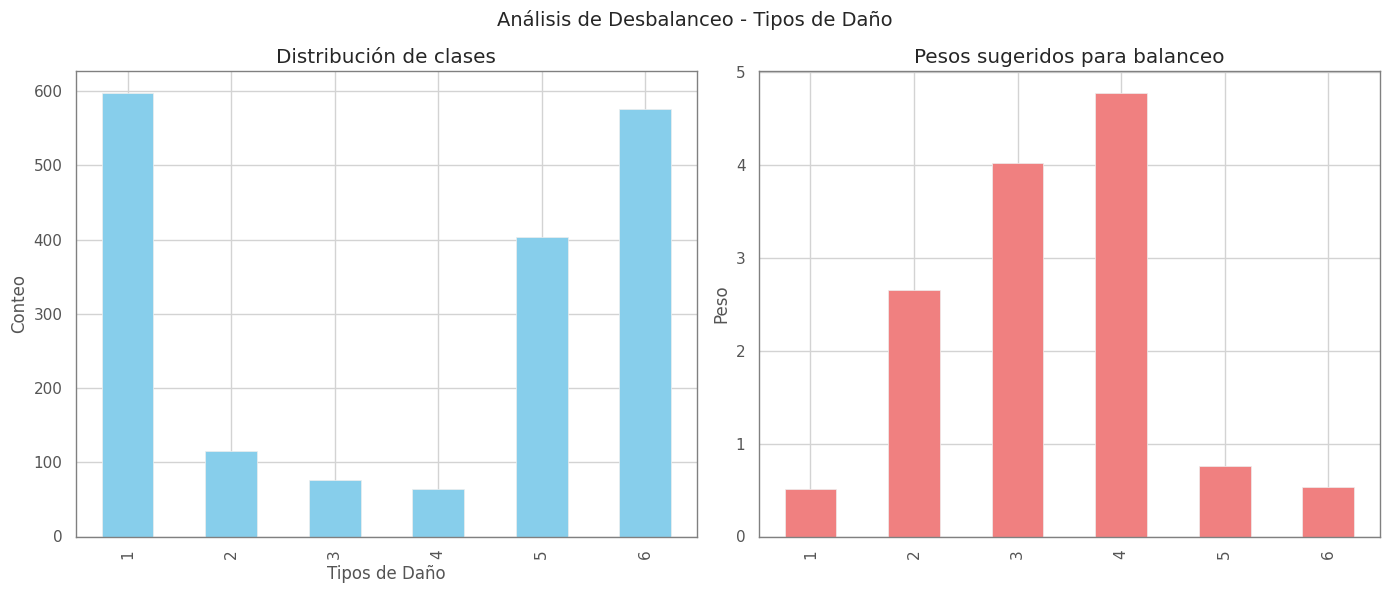

In [22]:
# 3. Uso para ver desbalanceo de Tipos de daño
visualizar_desbalanceo(df, 'Tipos de Daño', 'Análisis de Desbalanceo - Tipos de Daño')


Análisis de desbalanceo para Piezas del Vehículo:
Número de clases: 44
Ratio de desbalanceo: 354.00:1

Distribución:
Piezas del Vehículo
1      0.27
2      0.38
3      4.20
7      0.33
8      0.27
9      3.88
10     3.33
11     5.68
12     6.22
13     3.17
14     3.88
15     0.49
16     0.33
17     0.05
18     0.05
19     1.58
20     2.35
21     1.75
22     0.05
23     0.22
24     0.27
25     2.67
27     0.22
28     0.16
29     0.05
30     0.11
31     7.70
32     1.26
33    19.32
34    11.08
35     2.51
36     3.33
37     2.46
38     2.78
39     0.71
40     5.02
43     0.33
45     0.22
46     0.27
47     0.33
48     0.22
50     0.05
51     0.11
52     0.33

Pesos sugeridos para balanceo:
{np.int64(11): np.float64(0.40034965034965037), np.int64(34): np.float64(0.2051052395879982), np.int64(33): np.float64(0.11761684643040575), np.int64(40): np.float64(0.4525691699604743), np.int64(32): np.float64(1.8102766798418972), np.int64(31): np.float64(0.29529335912314636), np.int64(3): np.float6

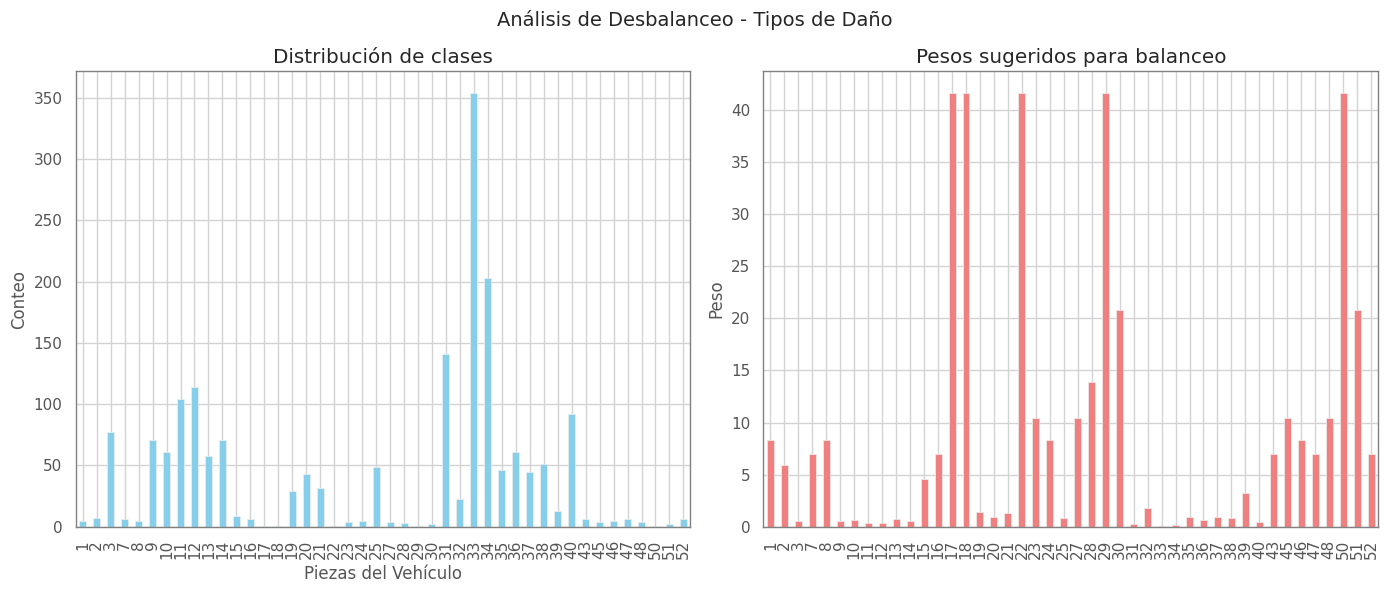

In [23]:
# 3. Uso para ver desbalanceo de Piezas del Vehículo
visualizar_desbalanceo(df, 'Piezas del Vehículo', 'Análisis de Desbalanceo - Tipos de Daño')


Análisis de desbalanceo para Sugerencia:
Número de clases: 2
Ratio de desbalanceo: 2.25:1

Distribución:
Sugerencia
1    69.21
2    30.79

Pesos sugeridos para balanceo:
{np.int64(1): np.float64(0.722397476340694), np.int64(2): np.float64(1.624113475177305)}


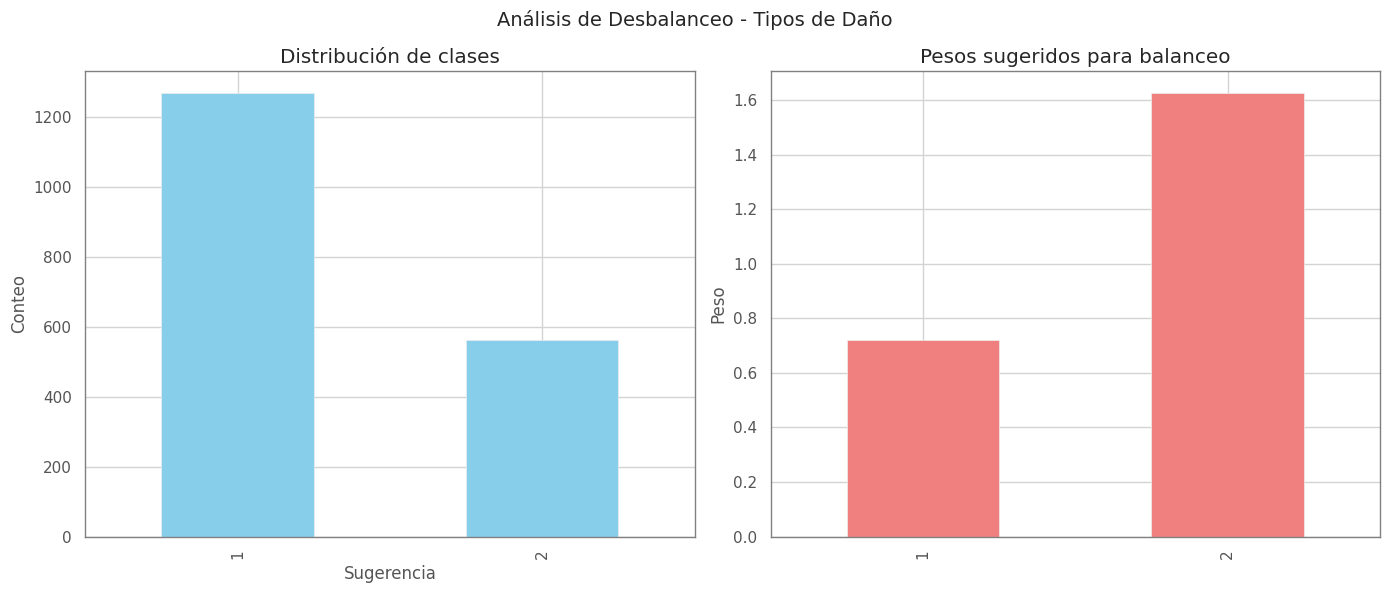

In [24]:
# 3. Uso para ver desbalanceo de Piezas del Vehículo
visualizar_desbalanceo(df, 'Sugerencia', 'Análisis de Desbalanceo - Tipos de Daño')

- Sugerencia:
    - Si una categoría (ej. "Reparar") tiene >70% de los datos, hay desbalanceo significativo.
    - Ratio > 3:1 (ej. 75% vs 25%) se considera problemático.
    
    Distribución de Sugerencias:
    - 1 -> Reparar ->    0.700812
    - 2 -> Reemplazar ->   0.299188

- Tipos de Daño:
    - Busca categorías con menos del 5% de representación.
    - Si el ratio entre el más común y el menos común es > 10:1, es crítico.

- Piezas del Vehículo:
    - Piezas con < 1% de aparición son candidatas a agruparse en "Otras".
    - Si el top 5 piezas concentra >80% de los datos, hay alta desproporción.

In [25]:
pesos = calcular_desbalanceo(df, 'Tipos de Daño')
print(pesos)


Análisis de desbalanceo para Tipos de Daño:
Número de clases: 6
Ratio de desbalanceo: 9.33:1

Distribución:
Tipos de Daño
1    32.59
2     6.28
3     4.15
4     3.49
5    22.05
6    31.44

Pesos sugeridos para balanceo:
{np.int64(1): np.float64(0.5114461194863205), np.int64(5): np.float64(0.7557755775577558), np.int64(6): np.float64(0.5300925925925926), np.int64(2): np.float64(2.655072463768116), np.int64(3): np.float64(4.017543859649122), np.int64(4): np.float64(4.770833333333333)}
{np.int64(1): np.float64(0.5114461194863205), np.int64(5): np.float64(0.7557755775577558), np.int64(6): np.float64(0.5300925925925926), np.int64(2): np.float64(2.655072463768116), np.int64(3): np.float64(4.017543859649122), np.int64(4): np.float64(4.770833333333333)}


In [26]:
import seaborn as sns

def plot_pesos_vs_distribucion(pesos_dict, counts, title):
    df_plot = pd.DataFrame({
        'Clase': counts.index,
        'Conteo': counts.values,
        'Peso': [pesos_dict[k] for k in counts.index]
    }).sort_values('Conteo')
    
    plt.figure(figsize=(12, 6))
    plt.title(f'Relación Conteo-Peso: {title}')
    
    # Gráfico de barras para conteos
    ax1 = plt.gca()
    sns.barplot(x='Clase', y='Conteo', data=df_plot, color='skyblue', ax=ax1)
    ax1.set_ylabel('Número de muestras')
    
    # Gráfico de línea para pesos
    ax2 = ax1.twinx()
    sns.lineplot(x='Clase', y='Peso', data=df_plot, color='red', marker='o', ax=ax2)
    ax2.set_ylabel('Peso sugerido')
    
    plt.xticks(rotation=90)
    plt.show()


Análisis de desbalanceo para Tipos de Daño:
Número de clases: 6
Ratio de desbalanceo: 9.33:1

Distribución:
Tipos de Daño
1    32.59
2     6.28
3     4.15
4     3.49
5    22.05
6    31.44

Pesos sugeridos para balanceo:
{np.int64(1): np.float64(0.5114461194863205), np.int64(5): np.float64(0.7557755775577558), np.int64(6): np.float64(0.5300925925925926), np.int64(2): np.float64(2.655072463768116), np.int64(3): np.float64(4.017543859649122), np.int64(4): np.float64(4.770833333333333)}


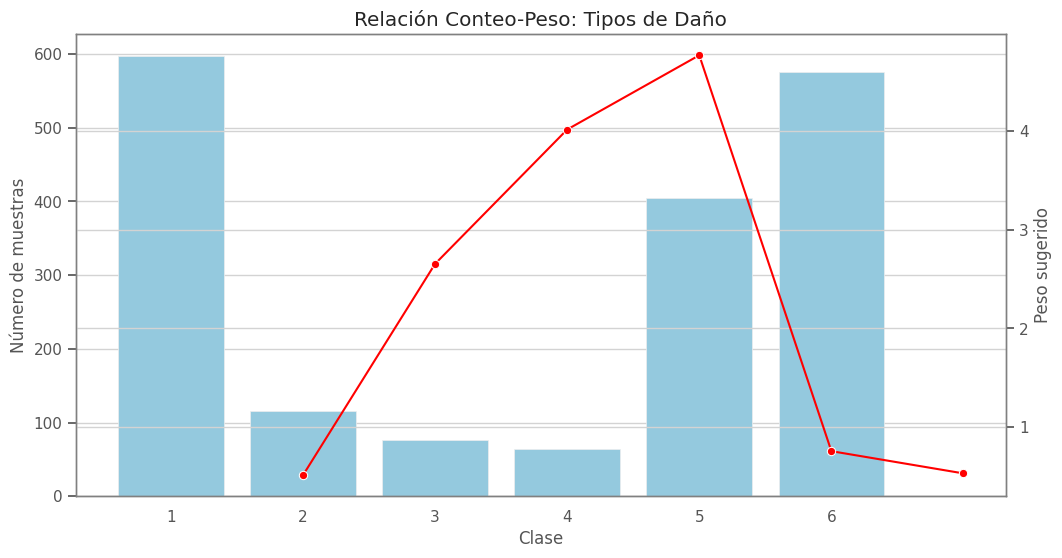

In [27]:
# Ejemplo de uso para Tipos de Daño
counts_danos = df['Tipos de Daño'].value_counts().sort_index()
pesos_danos = calcular_desbalanceo(df, 'Tipos de Daño')
plot_pesos_vs_distribucion(pesos_danos, counts_danos, 'Tipos de Daño')


Análisis de desbalanceo para Piezas del Vehículo:
Número de clases: 44
Ratio de desbalanceo: 354.00:1

Distribución:
Piezas del Vehículo
1      0.27
2      0.38
3      4.20
7      0.33
8      0.27
9      3.88
10     3.33
11     5.68
12     6.22
13     3.17
14     3.88
15     0.49
16     0.33
17     0.05
18     0.05
19     1.58
20     2.35
21     1.75
22     0.05
23     0.22
24     0.27
25     2.67
27     0.22
28     0.16
29     0.05
30     0.11
31     7.70
32     1.26
33    19.32
34    11.08
35     2.51
36     3.33
37     2.46
38     2.78
39     0.71
40     5.02
43     0.33
45     0.22
46     0.27
47     0.33
48     0.22
50     0.05
51     0.11
52     0.33

Pesos sugeridos para balanceo:
{np.int64(11): np.float64(0.40034965034965037), np.int64(34): np.float64(0.2051052395879982), np.int64(33): np.float64(0.11761684643040575), np.int64(40): np.float64(0.4525691699604743), np.int64(32): np.float64(1.8102766798418972), np.int64(31): np.float64(0.29529335912314636), np.int64(3): np.float6

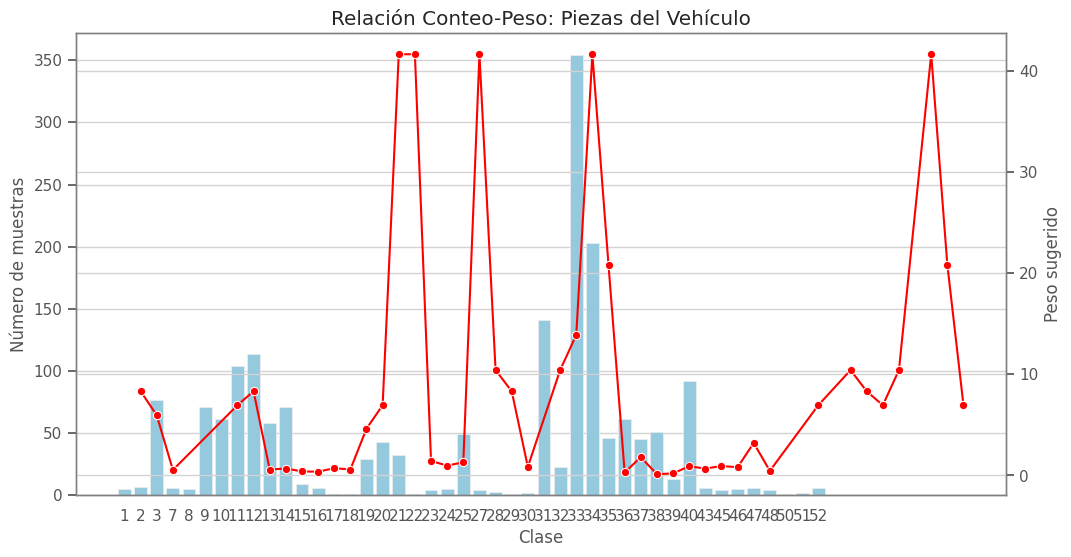

In [28]:
# Ejemplo de uso para Tipos de Daño
counts_danos = df['Piezas del Vehículo'].value_counts().sort_index()
pesos_danos = calcular_desbalanceo(df, 'Piezas del Vehículo')
plot_pesos_vs_distribucion(pesos_danos, counts_danos, 'Piezas del Vehículo')


Análisis de desbalanceo para Sugerencia:
Número de clases: 2
Ratio de desbalanceo: 2.25:1

Distribución:
Sugerencia
1    69.21
2    30.79

Pesos sugeridos para balanceo:
{np.int64(1): np.float64(0.722397476340694), np.int64(2): np.float64(1.624113475177305)}


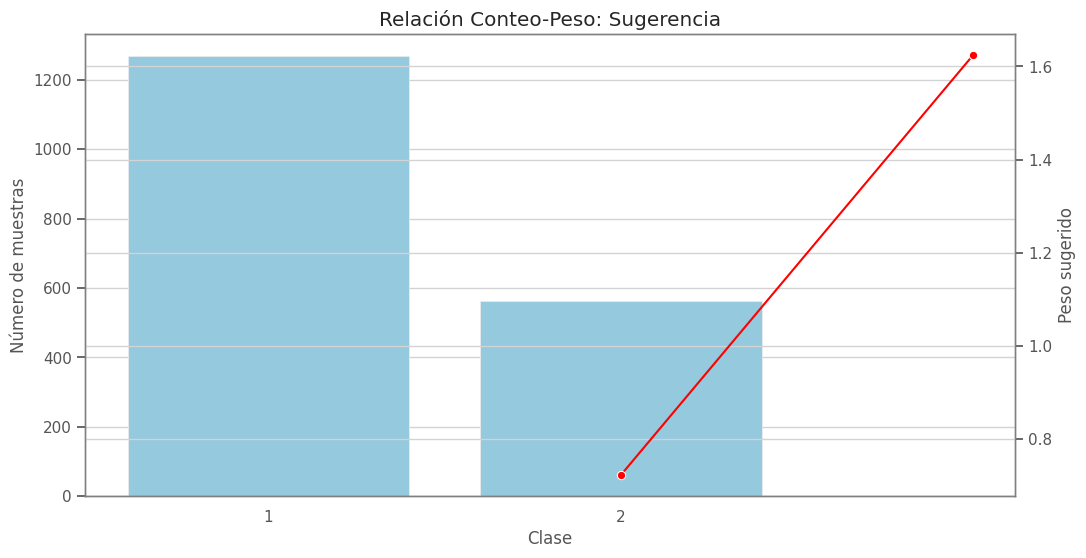

In [29]:
# Ejemplo de uso para Tipos de Daño
counts_danos = df['Sugerencia'].value_counts().sort_index()
pesos_danos = calcular_desbalanceo(df, 'Sugerencia')
plot_pesos_vs_distribucion(pesos_danos, counts_danos, 'Sugerencia')

En el análisis de desbalanceo se tienen algunas recomendaciones para mejorar los datos y el entrenamiento del modelo:

1. Estrategias para el Balanceo de Datos

- Para "Tipos de Daño" (6 clases, ratio 9.33:1)
    - Oversampling (para clases minoritarias 2, 3, 4):
    - Usa técnicas como SMOTE (Synthetic Minority Over-sampling Technique) para generar muestras sintéticas de las clases con menor representación (ej: clases 2, 3, 4).

    - Undersampling (para clases mayoritarias 1, 5, 6):
    - Reduce aleatoriamente muestras de las clases 1, 5 y 6 para equilibrar la distribución.

    - Pesos de clase:
    - Usa los pesos sugeridos en el análisis para penalizar más los errores en las clases minoritarias durante el entrenamiento.
    
        Ejemplo en PyTorch/TensorFlow:

        weights = torch.tensor([0.51, 2.65, 4.01, 4.77, 0.75, 0.52])  # Tipos de Daño
        criterion = torch.nn.CrossEntropyLoss(weight=weights)

- Para "Piezas del Vehículo" (45 clases, ratio 354:1)
    - Problema grave de desbalanceo: Algunas clases (ej: 17, 22, 51) tienen pesos extremadamente altos (>40), lo que indica que son muy raras.

        - Agrupa clases minoritarias: Combina clases con menos del 1% de frecuencia en una categoría "Otros".
        - Enfoque jerárquico: Si es posible, divide el problema en submodelos (ej: primero clasificar la zona del vehículo y luego la pieza específica).

        - Loss focal: Usa una función de pérdida focal (Focal Loss) para enfocarse en ejemplos difíciles/minoritarios.

            Ejemplo de Focal Loss en PyTorch
            criterion = FocalLoss(alpha=weights, gamma=2.0)  # gamma ajusta el enfoque en clases difíciles

- Para "Sugerencia" (2 clases, ratio 2.24:1)
    - El desbalanceo es moderado. Puedes:
        - Aplicar pesos de clase (ej: {1: 0.72, 2: 1.62}) en la función de pérdida.
        - Usar undersampling de la clase mayoritaria (1) o oversampling de la clase minoritaria (2).

2. Técnicas Generales para Mejorar el Entrenamiento
    - Validación cruzada estratificada:
    - Asegúrate de que cada fold de validación conserve la distribución original de las clases.

    - Métricas adecuadas:
    - No uses solo accuracy. Considera:
        - Matriz de confusión: Para ver errores por clase.
        - F1-score (macro/micro): Útil para clases desbalanceadas.
        - Precision-Recall Curve: Mejor que ROC para datos desbalanceados.

    - Early Stopping:
        Detén el entrenamiento si la pérdida en validación no mejora (para evitar sobreajuste en clases mayoritarias).

    - Data Augmentation:
        Si trabajas con imágenes/texto, genera variaciones sintéticas de las clases minoritarias.

3. Enfoques de Modelado
    - Modelos basados en ensamble:
    - Random Forest o XGBoost con parámetros como class_weight='balanced' pueden manejar mejor el desbalanceo.
    
        Ejemplo en XGBoost:

        model = XGBClassifier(scale_pos_weight=2.24)  # Para "Sugerencia" (ratio 69.18/30.82)

    - Redes neuronales:
    - Usa arquitecturas simples (evita overfitting) y capas de dropout. Añade los pesos de clase en la pérdida.

4. Consideraciones Adicionales
    - Revisión de datos:
    - Verifica si el desbalanceo refleja la realidad (ej: en un taller, ciertos daños/piezas pueden ser genuinamente raros).
    - Si es así, el modelo debe priorizar métricas como recall para las clases críticas pero minoritarias.

    - Transfer Learning:
        Si usas redes neuronales, inicializa con un modelo preentrenado y ajusta solo las últimas capas.

### Resumen de Acciones Prioritarias
    - Para "Piezas del Vehículo" (el caso más crítico):
        - Agrupa clases con frecuencia <1%.
        - Usa Focal Loss o pesos de clase extremos (ej: 40x para la clase 17).

    - Para "Tipos de Daño":
        - Aplica oversampling (SMOTE) + pesos de clase.

    - Para "Sugerencia":
        - Usa los pesos sugeridos (0.72 y 1.62) en la función de pérdida.

Si el rendimiento sigue siendo bajo, considera reformular el problema (ej: reducir el número de clases o usar un enfoque jerárquico).

---
---